In [1]:
import pandas as pd
import nltk

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

df = pd.read_csv('Sentiment_Analysis_Ryanair_Reviews_3.csv')

df.head()

,Number,Rating,Review
0,1,Bad,Not on time. Not to destination or back home. ...
1,2,Bad,Checkin If you are trying to verify your booki...
2,3,Bad,Terrible delays. Stealing people's time. 2 hou...
3,4,Bad,The staff members were friendly and there was ...
4,5,Bad,I took a flight from Italy to Romania and they...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  400 non-null    int64 
 1   Rating  400 non-null    object
 2   Review  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [3]:
df.groupby('Rating').describe()

Number                                                       
        count   mean        std    min     25%    50%     75%    max
Rating                                                              
Bad     200.0  100.5  57.879185    1.0   50.75  100.5  150.25  200.0
Good    200.0  300.5  57.879185  201.0  250.75  300.5  350.25  400.0

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Rating'] = label_encoder.fit_transform(df['Rating'])

In [5]:
df.groupby('Rating').describe()

Number                                                       
        count   mean        std    min     25%    50%     75%    max
Rating                                                              
0       200.0  100.5  57.879185    1.0   50.75  100.5  150.25  200.0
1       200.0  300.5  57.879185  201.0  250.75  300.5  350.25  400.0

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 20)
x = vectorizer.fit_transform(df['Review'])
y = df['Rating']

In [7]:
# text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
# text = vectorizer.inverse_transform(text)
# print(text)

In [8]:
#text

In [9]:
vectorizer

CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [11]:
x.shape, y.shape,x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 114), (400,), (200, 114), (200, 114), (200,), (200,))

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

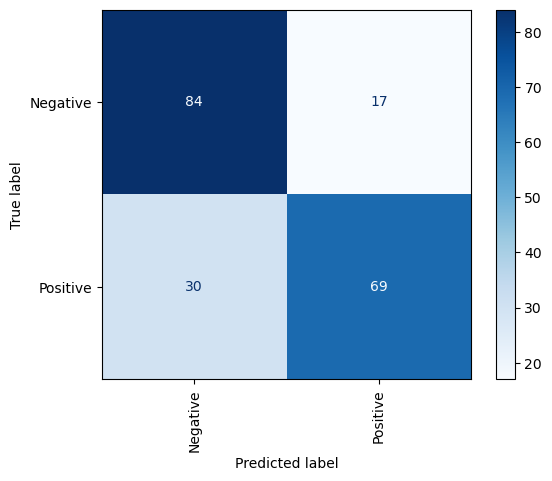

In [13]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical');

In [14]:
review = 'Good experience flying with them I recommend great friendly.'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.02296714, 0.97703286])

In [15]:
review = 'Excellent experience flying with them I recommend great friendly.'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.05491069, 0.94508931])

In [16]:
review = 'poor experience with them I do not.'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.58801659, 0.41198341])

In [17]:
review = 'avoid at all costs.'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.5303742, 0.4696258])

In [18]:
review = 'What you pay is what you get'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.69119256, 0.30880744])

In [19]:
review = 'All round the flight was good and arrived on time. Check in quick and boarding okay. Comfortable for what it is. Food/drink okay but as expected. Bags arrived no issue and staff are okay. Main benefit is this route is the only direct one between the UK and Genoa'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.03505981, 0.96494019])

In [20]:
review = 'This company kills you'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.64945145, 0.35054855])

In [21]:
review = 'Terrible flight, bad assitance, poor service'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.50193887, 0.49806113])

In [22]:
review = 'good'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.17278655, 0.82721345])

In [23]:
review = 'bad'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.5303742, 0.4696258])

In [24]:
review = 'terrible'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.5303742, 0.4696258])

In [25]:
review = 'I will not use Ryanair again in my life'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.47999865, 0.52000135])

In [26]:
review = 'neutral'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.5303742, 0.4696258])

In [27]:
review = 'I don not recommend this airline to anybody, is a rip off'
model.predict_proba(vectorizer.transform([review]))[0]

array([0.58272531, 0.41727469])